In [8]:
import requests
import pandas as pd
from user_info import COINAPI_KEY

In [5]:
def get_price(coin):
    """ Get current price of coin from coinbase API: https://docs.cloud.coinbase.com/sign-in-with-coinbase/docs/api-prices """
    url = 'https://api.coinbase.com/v2/prices/' + coin + '-USD/spot'
    response = requests.get(url)
    data = response.json()
    price = data['data']['amount']
    return float(price)

get_price("BTC")

16571.88

### Getting Historical OHLCV data

In [23]:
def get_historical_ohlcv_data(time_start, asset, num_items):
    """ Get historical OHLCV data from coinapi.io """
    url = 'https://rest.coinapi.io/v1/ohlcv/' + asset + '/USD/history?period_id=1DAY&time_start=' + time_start + '&limit=' + str(num_items)
    headers = {'X-CoinAPI-Key' : COINAPI_KEY}
    response = requests.get(url, headers=headers)
    data = response.json()
    df = pd.DataFrame(data)
    df['time_close'] = pd.to_datetime(df['time_close'])
    df = df.set_index('time_close')
    return df

### Getting Historical Quote Data (bid-ask)

In [15]:
# Get historical bitcoin quote data using coinapi
num_items = 10000
url = f'https://rest.coinapi.io/v1/quotes/BITSTAMP_SPOT_BTC_USD/history?time_start=2022-02-28T00:00:00&limit={num_items}'
headers = {'X-CoinAPI-Key' : COINAPI_KEY}
response = requests.get(url, headers=headers)

In [20]:
# Convert to pandas dataframe
data = response.json()
df = pd.DataFrame(data)
df.head()

,symbol_id,time_exchange,time_coinapi,ask_price,ask_size,bid_price,bid_size
0,BITSTAMP_SPOT_BTC_USD,2022-02-28T00:00:00.2170000Z,2022-02-28T00:00:00.2416777Z,37726.29,0.016000,37697.97,0.05
1,BITSTAMP_SPOT_BTC_USD,2022-02-28T00:00:00.2970000Z,2022-02-28T00:00:00.3097878Z,37726.30,0.766206,37697.97,0.05
2,BITSTAMP_SPOT_BTC_USD,2022-02-28T00:00:00.5030000Z,2022-02-28T00:00:00.5165177Z,37726.30,0.766206,37697.98,0.10
3,BITSTAMP_SPOT_BTC_USD,2022-02-28T00:00:01.8980000Z,2022-02-28T00:00:01.9116455Z,37726.29,0.016000,37697.98,0.10
4,BITSTAMP_SPOT_BTC_USD,2022-02-28T00:00:02.0060000Z,2022-02-28T00:00:02.0247879Z,37726.30,0.766206,37697.98,0.10


In [22]:
#Save the bitcoin price data
df.to_csv('btc_quotes.csv', index=False)

<AxesSubplot: xlabel='time_exchange'>

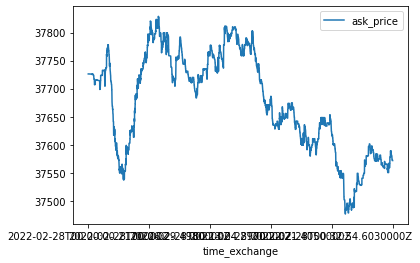

In [21]:
# Plot the bitcoin price over time
df.plot(x='time_exchange', y='ask_price')

In [24]:
eth_url = f'https://rest.coinapi.io/v1/quotes/BITSTAMP_SPOT_ETH_USD/history?time_start=2022-02-28T00:00:00&limit={num_items}'
headers = {'X-CoinAPI-Key' : COINAPI_KEY}
response = requests.get(eth_url, headers=headers)

In [25]:
eth_data = response.json()
eth_df = pd.DataFrame(eth_data)
eth_df.head()

ValueError: If using all scalar values, you must pass an index